In [81]:
import pandas as pd
import numpy as np
import math
from scipy.stats import poisson
# import japanize_matplotlib
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('../assets/liga1920.csv')

liga1920home = df[df['HomeTeam']=='Barcelona']
liga1920home = liga1920home[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
liga1920home = liga1920home.rename(columns={'FTHG':'HomeGoals', 'FTAG': 'againstG(H)'})

liga1920away = df[df['AwayTeam']=='Barcelona']
liga1920away = liga1920away[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
liga1920away = liga1920away.rename(columns={'FTHG':'againstG(A)', 'FTAG': 'AwayGoals'})
liga1920home.reset_index(drop=True, inplace=True)
liga1920away.reset_index(drop=True, inplace=True)

In [82]:
liga1920 = pd.concat([liga1920home, liga1920away], axis=1)
liga1920_goal = liga1920[['HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals']]
liga1920_goal.mean()

HomeGoals    2.736842
AwayGoals    1.789474
dtype: float64

In [77]:
poisson_pred = np.column_stack([[poisson.pmf(i, liga1920_goal.mean()[j]) for i in range(9)] for j in range(2)])


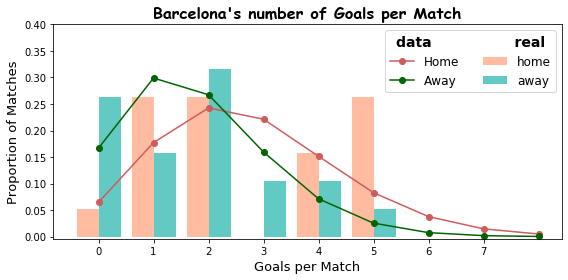

In [79]:
fig, ax = plt.subplots(figsize=(8,4))  
# plot histogram of actual goals
plt.hist(liga1920[['HomeGoals', 'AwayGoals']].values, range(9), 
         alpha=0.7, label=['home', 'away'],density=True, color=["#FFA07A", "#20B2AA"])

pois1, = plt.plot([i-0.5 for i in range(1,10)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,10)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')
matplotlib.rcParams['font.family'] = 'IPAPGothic'
leg=plt.legend(loc='upper right', fontsize=12, ncol=2)
leg.set_title("data                 real", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Barcelona's number of Goals per Match",size=16,fontweight='bold', fontname="fantasy")
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

